## Import libraries

In [1]:
import numpy as np
import pandas as pd

## Import dataset
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

In [2]:
data_df=pd.read_csv('/Users/HP/Downloads/Folds5x2_pp.csv')


In [25]:
data_df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [3]:
data_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## plotting Individual Graph

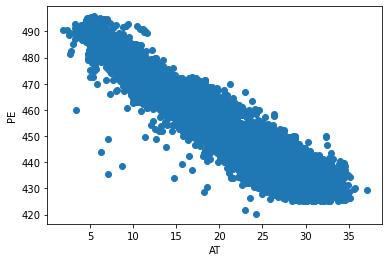

In [28]:
import matplotlib.pyplot as plt
plt.scatter(data_df['AT'],data_df['PE'])
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

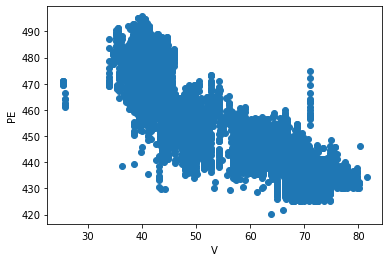

In [29]:
plt.scatter(data_df['V'],data_df['PE'])
plt.xlabel('V')
plt.ylabel('PE')
plt.show()

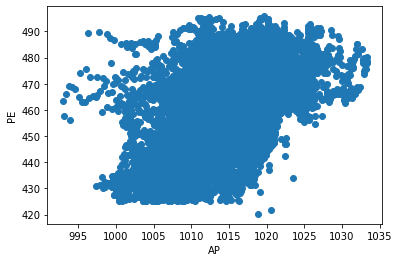

In [30]:
plt.scatter(data_df['AP'],data_df['PE'])
plt.xlabel('AP')
plt.ylabel('PE')
plt.show()

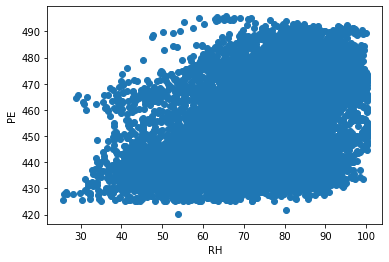

In [31]:
plt.scatter(data_df['RH'],data_df['PE'])
plt.xlabel('RH')
plt.ylabel('PE')
plt.show()

## define X and Y

In [4]:

x=data_df.drop(['PE'],axis=1).values
y=data_df['PE'].values

In [5]:
print(x)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [6]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


# split the dataset in training set and test set

In [10]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=0)


In [36]:
x_train.shape

(6410, 4)

In [33]:
y_train.shape

(6410,)

# Train the model on the training set

In [12]:

from sklearn.linear_model import LinearRegression
nl = LinearRegression()
nl.fit(x_train,y_train)

LinearRegression()

# predict the test set results

In [13]:

y_pred =nl.predict(x_test)
print(y_pred)

[431.39746929 458.61306823 462.8132933  ... 430.24576539 464.47083536
 444.08498274]


In [15]:
nl.predict([[14.96,41.76,1024.07,73.17]])

array([467.36527472])

# Evaluate the model

In [16]:

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9310173107097915

# Plot the results

Text(0.5, 1.0, 'Actual vs. Predicted')

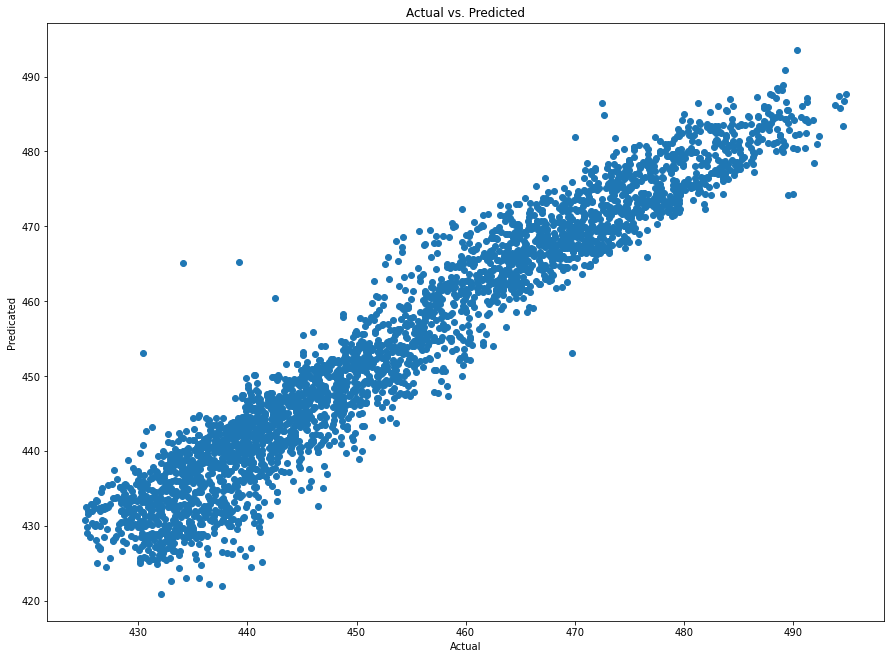

In [23]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15,11))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicated')
plt.title('Actual vs. Predicted')

# Predicted Values

In [24]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred, 'Difference': y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Difference
0,431.23,431.397469,-0.167469
1,460.01,458.613068,1.396932
2,461.14,462.813293,-1.673293
3,445.90,448.618875,-2.718875
4,451.29,457.886495,-6.596495
5,432.68,429.695875,2.984125
6,477.50,473.039180,4.460820
7,459.68,456.548523,3.131477
8,477.50,474.360287,3.139713
9,444.99,446.406480,-1.416480
